# **1.Importing libraries 📚**

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tqdm import tqdm 
from keras.models import Sequential
from keras.layers import LSTM, Dense , Dropout
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# **2.Loading Data📖**

In [2]:
train = pd.read_csv("/kaggle/input/ieeenu-cis-senior-members-time-forecasting/train (1).csv")

In [3]:
test = pd.read_csv("/kaggle/input/ieeenu-cis-senior-members-time-forecasting/test.csv")

In [4]:
Time = pd.to_datetime(train.time, format = '%Y-%m-%d %H:%M:%S')

In [5]:
train = train.drop(['time','Unnamed: 0','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv'], axis=1)
test = test.drop(['time','ID','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv'], axis=1)

In [6]:
column_names = train.columns
c = list(column_names)
print(c)

['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']


# **3.Plotting Data 📊**

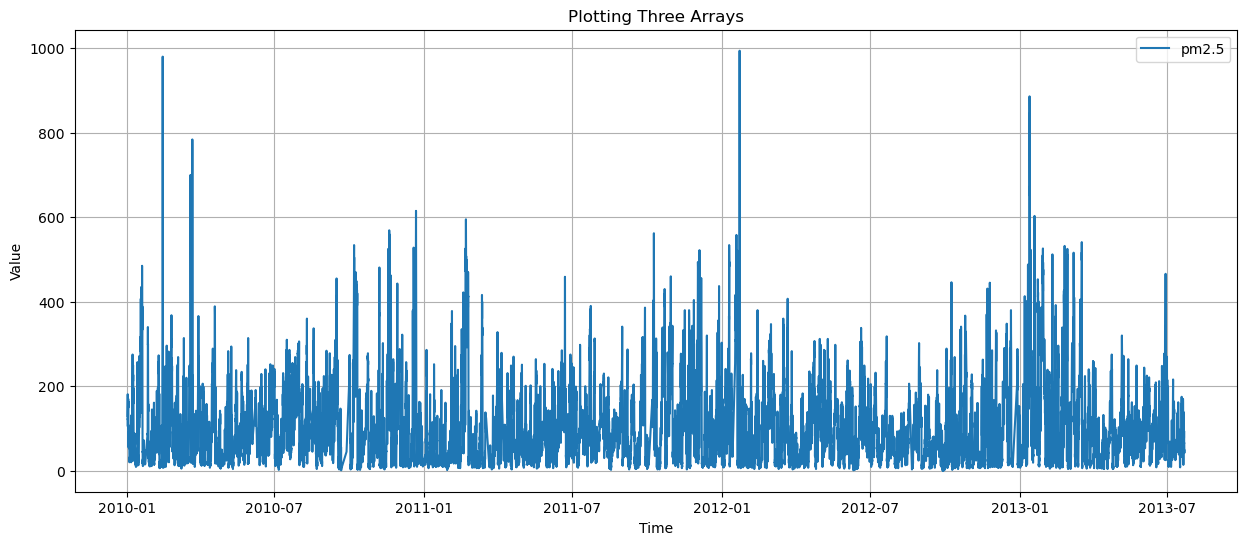

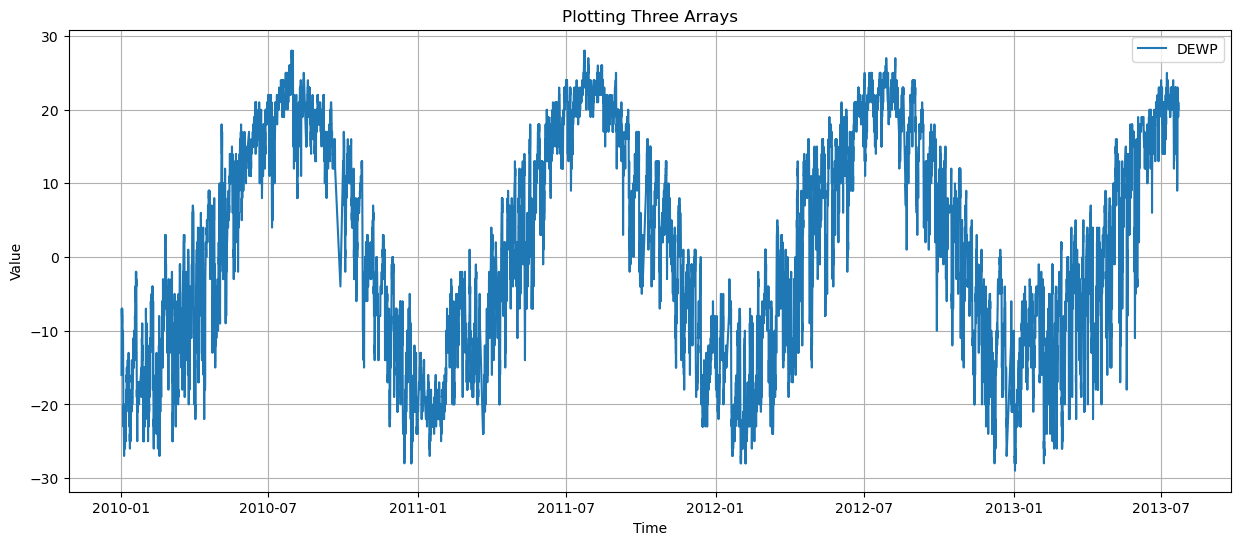

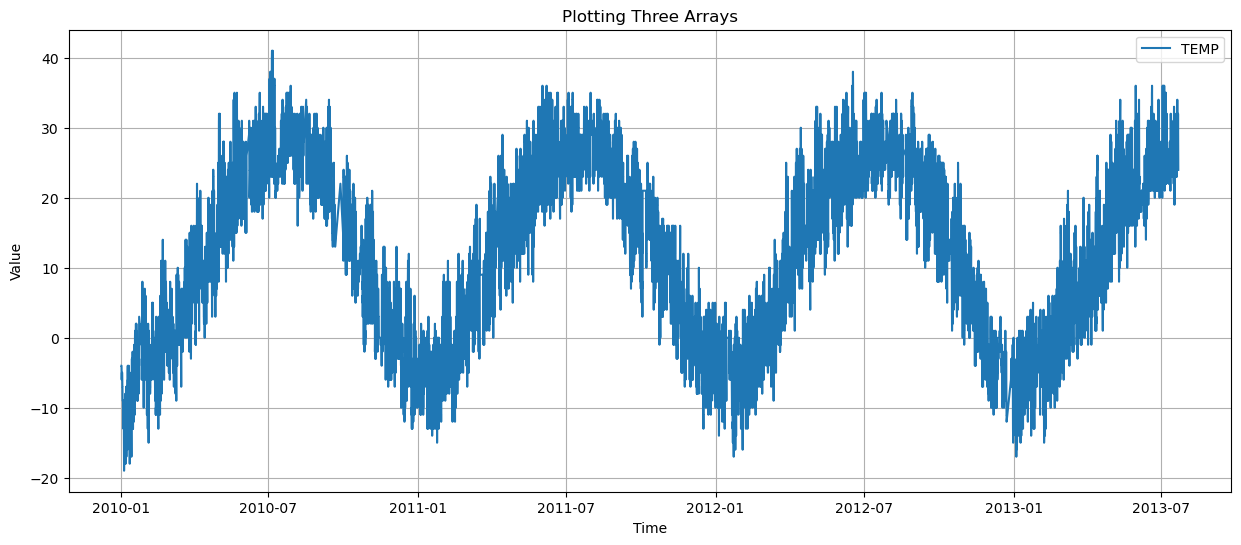

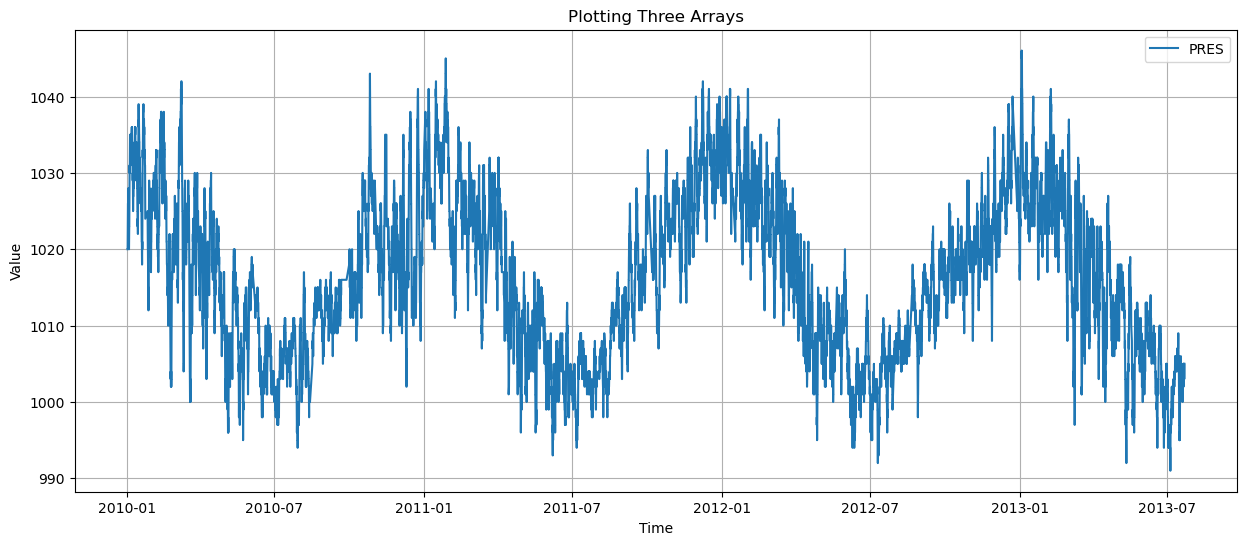

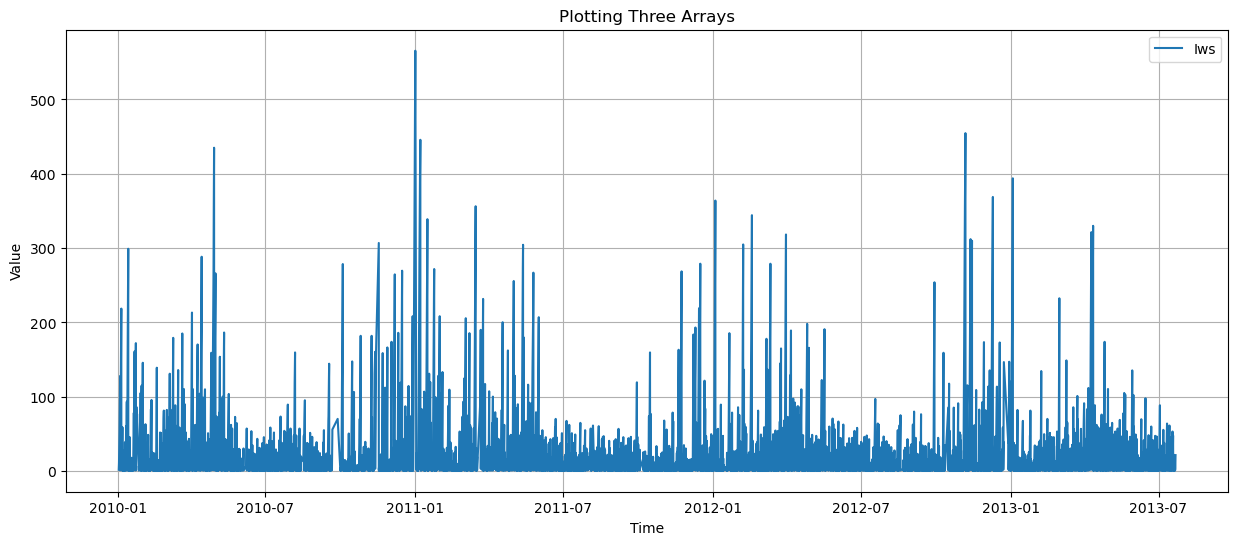

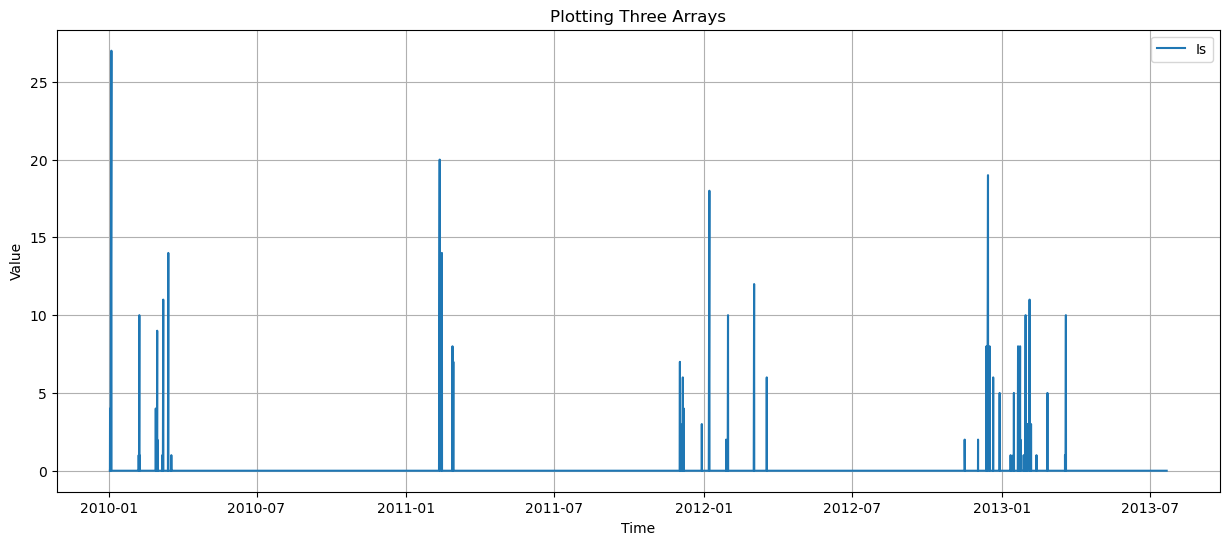

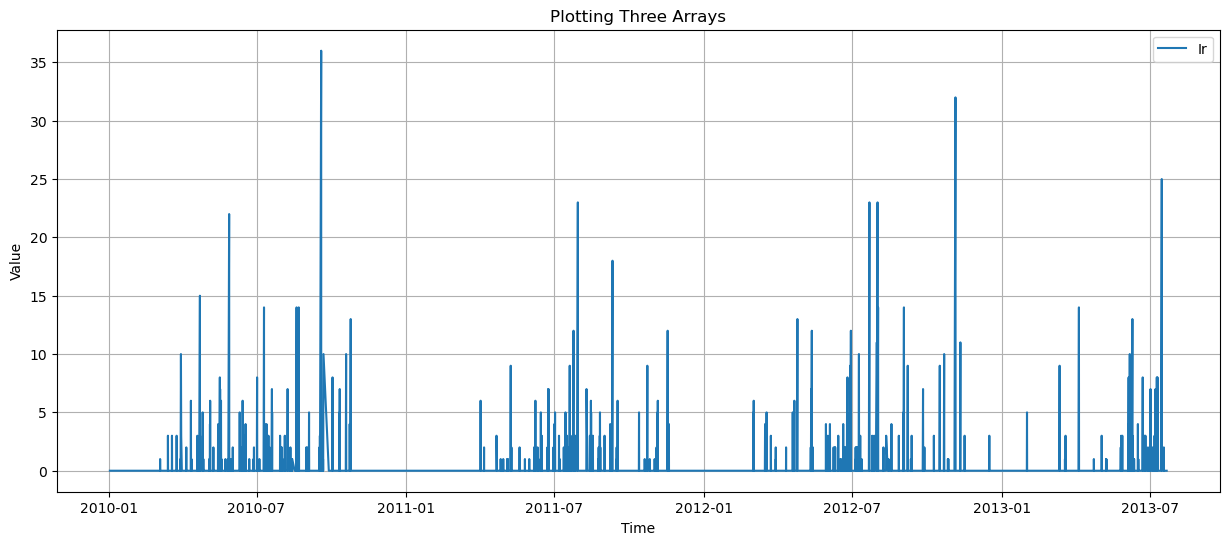

In [7]:

 
# Example arrays
x = Time

for y in c:
    plt.figure(figsize=(15, 6))
    plt.plot(x, train[y], label=y)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Plotting Three Arrays')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()



In [8]:
train

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,129.0,-16,-4.0,1020.0,1.79,0,0
1,148.0,-15,-4.0,1020.0,2.68,0,0
2,159.0,-11,-5.0,1021.0,3.57,0,0
3,181.0,-7,-5.0,1022.0,5.36,1,0
4,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...
29224,56.0,19,31.0,1004.0,16.09,0,0
29225,48.0,19,29.0,1004.0,17.88,0,0
29226,42.0,19,28.0,1004.0,19.67,0,0
29227,50.0,21,27.0,1005.0,20.56,0,0


# **4.Data Pre-processing 🏋️‍♂️**

In [9]:
def h(hops,train,test):
    m = (hops*-1)+4
    print(m)
    temp = train[m:]
    t = pd.concat((temp,test),axis=0)
    return t

In [10]:
hops = 100
if hops !=4:
    test = h(hops,train,test)

-96


In [11]:
test

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
29133,53.0,21,26.0,1005.0,40.67,0,0
29134,72.0,21,26.0,1005.0,44.69,0,0
29135,100.0,21,25.0,1005.0,46.48,0,0
29136,128.0,22,24.0,1005.0,49.61,0,0
29137,135.0,22,24.0,1004.0,51.40,0,0
...,...,...,...,...,...,...,...
12523,NaN,-23,-2.0,1034.0,231.97,0,0
12524,NaN,-22,-3.0,1034.0,237.78,0,0
12525,NaN,-22,-3.0,1034.0,242.70,0,0
12526,NaN,-22,-4.0,1034.0,246.72,0,0


In [12]:
# train_x = train.drop(['pm2.5'], axis=1)
# test_x = test.drop(['pm2.5'], axis=1)
train_x =  train
test_x = test

In [13]:
# scaler = MinMaxScaler()
# scaler2 = MinMaxScaler()
scaler = StandardScaler()
scaler2 = StandardScaler()
x_train_scaled = scaler.fit_transform(train_x)
y_train_scaled = scaler2.fit_transform(train[['pm2.5']])

In [14]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(29229, 7)
(29229, 1)


In [15]:
x_test_scaled = scaler.fit_transform(test_x)
y_test_scaled = scaler2.fit_transform(test[['pm2.5']][:hops])

In [16]:
# print(x_test_scaled.shape)
# print(y_test_scaled.shape)

In [17]:
no_samples = x_train_scaled.shape[0]
no_columns = x_train_scaled.shape[1]
x_train = []
y_train = []
for i in range(hops,no_samples):
    x_train.append(x_train_scaled[i-hops:i])
    y_train.append(y_train_scaled[i][0])
x = np.array(x_train)
y= np.array(y_train)

In [18]:
no_samples = x_test_scaled.shape[0]
no_columns = x_test_scaled.shape[1]
x_test = []
y_test = []
for i in range(hops,no_samples):
    x_test.append(x_test_scaled[i-hops:i])
for i in range(y_test_scaled.shape[0]):
    y_test.append(y_test_scaled[i][0])
X = np.array(x_test)
Y = np.array(y_test)

In [19]:
print(x.shape)
print(y.shape)

(29129, 100, 7)
(29129,)


# **5. Defining The Network 🌐**

In [20]:

model = Sequential()

# Add an LSTM layer
model.add(LSTM(50, return_sequences=True,input_shape=(hops,7)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


# **6.Training the model🚅**

In [21]:
from keras.callbacks import LambdaCallback

# Define the custom callback
print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: 
                                print(f"Epoch: {epoch + 1}, Loss: {logs['loss']:.4f}") if (epoch + 1) % 100 == 0 else None)

# Train the model
model.fit(x, y, epochs=500, batch_size=x.shape[0], callbacks=[print_callback],verbose=0)


1/1 [==============================] - 0s 417ms/step - loss: 0.0755
Epoch 411/500
1/1 [==============================] - 0s 425ms/step - loss: 0.0755
Epoch 412/500
1/1 [==============================] - 0s 419ms/step - loss: 0.0763
Epoch 413/500
1/1 [==============================] - 0s 441ms/step - loss: 0.0750
Epoch 414/500
1/1 [==============================] - 0s 429ms/step - loss: 0.0758
Epoch 415/500
1/1 [==============================] - 0s 419ms/step - loss: 0.0758
Epoch 416/500
1/1 [==============================] - 0s 418ms/step - loss: 0.0760
Epoch 417/500
1/1 [==============================] - 0s 426ms/step - loss: 0.0759
Epoch 418/500
1/1 [==============================] - 0s 417ms/step - loss: 0.0755
Epoch 419/500
1/1 [==============================] - 0s 421ms/step - loss: 0.0754
Epoch 420/500
1/1 [==============================] - 0s 418ms/step - loss: 0.0764
Epoch 421/500
1/1 [==============================] - 0s 418ms/step - loss: 0.0761
Epoch 422/500
1/1 [===========

# **7.Testing the model📝**

In [22]:
preds=model.predict(x)

911/911 [==============================] - 5s 5ms/step


In [23]:
preds.shape

(29129, 1)

In [24]:
preds = scaler2.inverse_transform(preds)

In [25]:
preds[:20] 

array([[ 77.7388  ],
       [ 71.30781 ],
       [ 72.02711 ],
       [ 69.326866],
       [ 70.71844 ],
       [ 68.36081 ],
       [ 71.67482 ],
       [ 73.43055 ],
       [ 77.19675 ],
       [ 72.358665],
       [ 79.1328  ],
       [ 83.31735 ],
       [ 83.57608 ],
       [ 85.46268 ],
       [ 88.96669 ],
       [107.059   ],
       [ 95.81803 ],
       [110.78044 ],
       [126.629166],
       [ 96.04616 ]], dtype=float32)

In [26]:
train['pm2.5'][:20]

0     129.0
1     148.0
2     159.0
3     181.0
4     138.0
5     109.0
6     105.0
7     124.0
8     120.0
9     132.0
10    140.0
11    152.0
12    148.0
13    164.0
14    158.0
15    154.0
16    159.0
17    164.0
18    170.0
19    149.0
Name: pm2.5, dtype: float64

# **8.Train vs Prediction plot📉** 

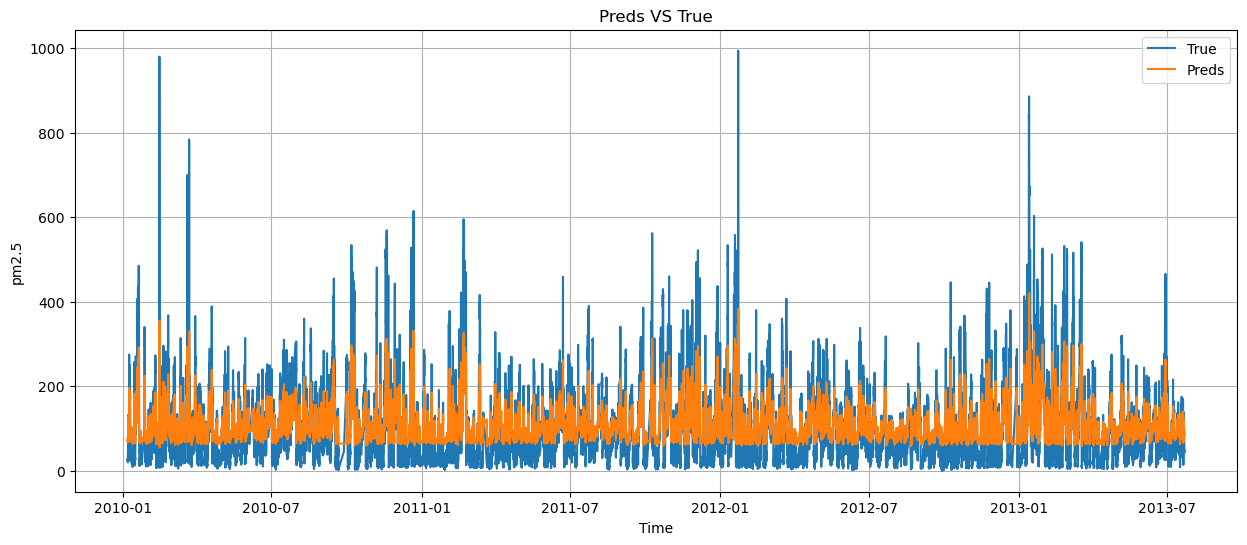

In [27]:
plt.figure(figsize=(15, 6))  # 15 inches wide and 6 inches tall

z = Time[hops:]
x = train["pm2.5"][hops:]
y = preds
plt.plot(z, x, label='True')
plt.plot(z, y, label='Preds')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('pm2.5')
plt.title('Preds VS True')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# **9.Predicting🎯**

In [91]:
X[2]

array([[-0.12950801,  1.29154802,  0.96949707, -1.17826228,  0.54271875,
        -0.0400602 , -0.13141272],
       [ 0.52386573,  1.36072517,  0.88232519, -1.17826228,  0.60782988,
        -0.0400602 , -0.13141272],
       [-0.57046622,  1.36072517,  0.88232519, -1.2802422 ,  0.64506595,
        -0.0400602 , -0.13141272],
       [        nan,  1.42990233,  0.88232519, -1.17826228,  0.68230203,
        -0.0400602 , -0.13141272],
       [ 1.20057425,  1.36072517,  0.88232519, -1.17826228, -0.405657  ,
        -0.0400602 , -0.13141272],
       [ 1.03723082,  1.42990233,  0.88232519, -1.17826228, -0.38714298,
        -0.0400602 , -0.13141272],
       [ 0.92055694,  1.36072517,  0.96949707, -1.17826228, -0.3590599 ,
        -0.0400602 , -0.13141272],
       [ 1.13056992,  1.36072517,  0.96949707, -1.17826228, -0.29394878,
        -0.0400602 , -0.13141272],
       [ 1.34058291,  1.42990233,  0.96949707, -1.17826228, -0.25671271,
        -0.0400602 ,  0.91656847],
       [ 1.43392202,  1.4299

In [ ]:

truepreds = []
q = X.shape[0]
for i in tqdm(range(q)):
    x_ = X[i:i+1]
   
    t = model.predict(x_,verbose=0)
    print(t.shape)
    for j in range(1,hops+1):
        if i+j < q:
            
            X[i+j][hops-j][0] = t[0][0]
            print(X[i+j][hops-j][0]) 
                
    truepreds.append(t[0][0])
   

In [62]:
len(truepreds)

12524

In [ ]:
truepreds

In [61]:
tp = np.array(truepreds)
tp

array([-0.5704662,        nan,        nan, ...,        nan,        nan,
              nan], dtype=float32)

In [31]:

truepreds_ = scaler2.inverse_transform(tp.reshape(-1,1))

In [32]:
s = truepreds_.flatten()

In [33]:
s.shape

(12524,)

In [34]:
s.shape

(12524,)

In [35]:
Yscaled = scaler2.inverse_transform(Y.reshape(-1,1))

In [36]:
Yscaled = Yscaled.flatten()

In [44]:
len(Yscaled)

100

In [45]:
f = np.concatenate((Yscaled, s))

In [46]:
len(f)

12624

In [47]:
tf = pd.read_csv("/kaggle/input/ieeenu-cis-senior-members-time-forecasting/test.csv")

In [48]:
tf = tf.drop(['time'] , axis=1)

In [54]:
f[96:]

array([54., 61., 73., ..., nan, nan, nan])

In [52]:
tf['pm2.5'] = f[96:]

In [53]:
tf

,ID,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,31151,54.000000,21,24.0,1005,22.34,0,0,0,0,1,0
1,31152,61.000000,21,24.0,1005,23.23,0,0,0,0,1,0
2,31153,73.000000,20,25.0,1005,26.36,0,0,0,0,1,0
3,31154,84.000000,20,23.0,1004,27.25,0,0,0,0,1,0
4,31155,81.102959,20,22.0,1005,28.14,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,43819,NaN,-23,-2.0,1034,231.97,0,0,0,1,0,0
12524,43820,NaN,-22,-3.0,1034,237.78,0,0,0,1,0,0
12525,43821,NaN,-22,-3.0,1034,242.70,0,0,0,1,0,0
12526,43822,NaN,-22,-4.0,1034,246.72,0,0,0,1,0,0


In [ ]:
tf.to_csv('sol.csv',index = False)